# **Exploratory Data Analysis**

Let's import the libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance

In [2]:
# accessing the google drive
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [40]:
# reading car data from cleaned_chevrolet_cars.csv
df = pd.read_csv('/content/mount/MyDrive/practise_csv/cleaned_chevrolet_cars.csv')
df.head()

,name,year,type,pozitsiya,fuel_type,transmission,engine_size,region,price
0,Damas,2023,Chevrolet,1,Benzin,Mexanika,0.0,Olmaliq,10700
1,Equinox,2023,Chevrolet,1,Benzin,Mexanika,0.0,Farg'ona,41000
2,Lacetti,2014,Chevrolet,1,Benzin,Avtomat,1.8,Toshkent,12000
3,Lacetti,2010,Chevrolet,3,Benzin,Avtomat,1.8,Samarqand,9200
4,Spark,2021,Chevrolet,2,Benzin,Mexanika,1.3,Toshkent,11500


In [41]:
# getting full info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          19999 non-null  object 
 1   year          20000 non-null  int64  
 2   type          20000 non-null  object 
 3   pozitsiya     20000 non-null  int64  
 4   fuel_type     19876 non-null  object 
 5   transmission  20000 non-null  object 
 6   engine_size   20000 non-null  float64
 7   region        20000 non-null  object 
 8   price         20000 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [42]:
# copy dataset
copied_df = df

In [43]:
copied_df = copied_df.drop(['region'], axis=1)

In [44]:
# number of missing rows
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Number', 'Percent'])
    return missing_values

In [45]:
missing(copied_df)

,Number,Percent
fuel_type,124,0.00620
name,1,0.00005
year,0,0.00000
type,0,0.00000
pozitsiya,0,0.00000
transmission,0,0.00000
engine_size,0,0.00000
price,0,0.00000


In [46]:
# filling defualt fuel type
copied_df['fuel_type'].fillna('Benzin', inplace=True)

In [47]:
# remove row which has missed name
copied_df.dropna(subset=['name'], inplace=True)

In [10]:
missing(copied_df)

,Number,Percent
name,0,0.0
year,0,0.0
type,0,0.0
pozitsiya,0,0.0
fuel_type,0,0.0
transmission,0,0.0
engine_size,0,0.0
region,0,0.0
price,0,0.0


In [48]:
copied_df.nunique()

name              32
year              29
type               1
pozitsiya          4
fuel_type          3
transmission       4
engine_size       45
price           1034
dtype: int64

In [49]:
copied_df['name'].unique()

array(['Damas', 'Equinox', 'Lacetti', 'Spark', 'Cobalt', 'Captiva',
       'Nexia2', 'Gentra', 'Matiz', 'Nexia3', 'Epica', 'Malibu', 'Onix',
       'Malibu2', 'Labo', 'TrackerPremier', 'Tracker', 'Monza',
       'MatizBest', 'Orlando', 'Niva', 'Tracker2', 'TrailBlazer', 'Bolt',
       'Cruze', 'Traverse', 'Tacuma', 'Evanda', 'Camaro', 'Tahoe',
       'Menlo', 'Tracker4'], dtype=object)

In [50]:
numerical= copied_df.drop(['price'], axis=1).select_dtypes('number').columns

categorical = copied_df.select_dtypes('object').columns

print(f'Numerical Columns:  {copied_df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {copied_df[categorical].columns}')

Numerical Columns:  Index(['year', 'pozitsiya', 'engine_size'], dtype='object')


Categorical Columns: Index(['name', 'type', 'fuel_type', 'transmission'], dtype='object')


In [51]:
copied_df['price'].describe()

count     19999.000000
mean      12645.432772
std        6339.951057
min        1700.000000
25%        8200.000000
50%       11090.000000
75%       15100.000000
max      180000.000000
Name: price, dtype: float64

In [52]:
print( f"Skewness: {copied_df['price'].skew()}")

Skewness: 3.4831546514087877


<Axes: ylabel='Frequency'>

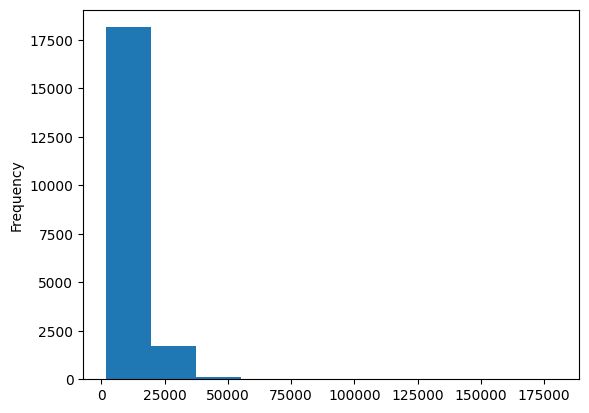

In [53]:
copied_df['price'].plot(kind='hist')

In [54]:
copied_df[numerical].describe()

,year,pozitsiya,engine_size
count,19999.000000,19999.000000,19999.000000
mean,2019.572079,2.285614,1.293622
std,4.746351,1.194098,0.713971
min,1991.000000,1.000000,0.000000
25%,2017.000000,1.000000,0.800000
50%,2022.000000,2.000000,1.500000
75%,2023.000000,3.000000,1.500000
max,2023.000000,4.000000,13.000000


<Axes: ylabel='Frequency'>

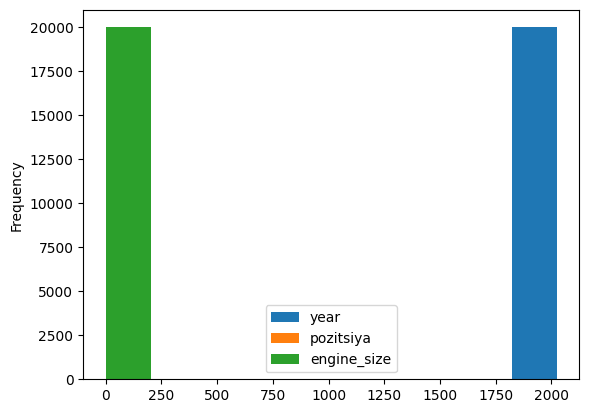

In [55]:
copied_df[numerical].plot(kind='hist')

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

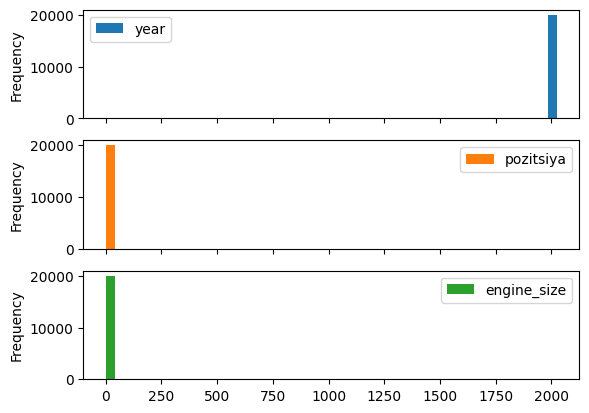

In [56]:
copied_df[numerical].plot(kind='hist', subplots=True, bins=50)

In [57]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = copied_df[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

engine_size    2.291350
year          -1.391347
dtype: float64

<Axes: ylabel='Frequency'>

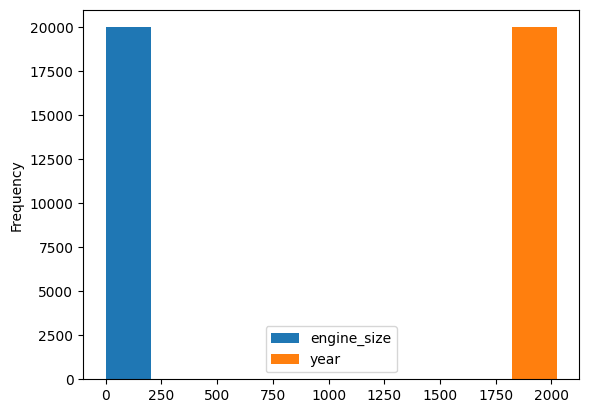

In [58]:
copied_df[skew_cols.index].plot(kind='hist')

# **Categorical Features**

In [59]:
copied_df[categorical].head()

,name,type,fuel_type,transmission
0,Damas,Chevrolet,Benzin,Mexanika
1,Equinox,Chevrolet,Benzin,Mexanika
2,Lacetti,Chevrolet,Benzin,Avtomat
3,Lacetti,Chevrolet,Benzin,Avtomat
4,Spark,Chevrolet,Benzin,Mexanika


fuel_type
Gaz-benzin    10222.890985
Benzin        13090.802099
Elektr        29062.000000
Name: price, dtype: float64



array([<Axes: ylabel='Frequency'>], dtype=object)

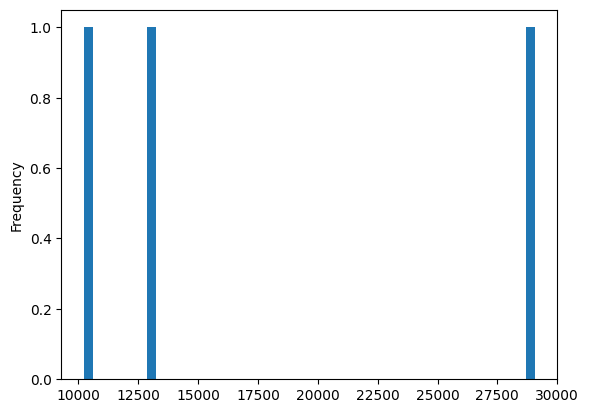

In [60]:
print(copied_df.groupby('fuel_type')['price'].mean().sort_values())
print()
copied_df.groupby('fuel_type')['price'].mean().plot(kind='hist',subplots=True,bins=50)

transmission
Tiptronik     8558.297297
Mexanika      9861.725890
Avtomat      15842.757035
Variator     21922.000000
Name: price, dtype: float64



array([<Axes: ylabel='Frequency'>], dtype=object)

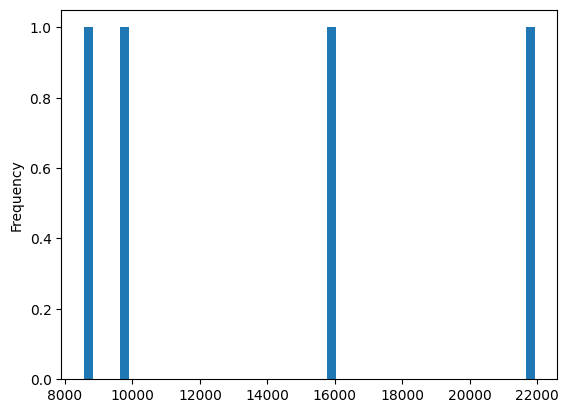

In [61]:
print(copied_df.groupby('transmission')['price'].mean().sort_values())
print()
copied_df.groupby('transmission')['price'].mean().plot(kind='hist', subplots=True, bins=50)

name
Matiz              4985.181922
MatizBest          5553.981818
Nexia2             6870.044693
Tacuma             7237.500000
Evanda             7466.000000
Niva               8063.157895
Damas              8347.340517
Labo               8515.681552
Spark              9167.643458
Epica             10787.200000
Cruze             11133.333333
Nexia3            11931.399417
Cobalt            12609.503030
Lacetti           12983.621762
Gentra            14694.868515
Onix              17595.500000
Malibu            18936.791045
Orlando           19013.085106
Captiva           19814.503667
Tracker2          20937.725000
Tracker4          21644.500000
Monza             21840.883721
Tracker           21951.397882
Bolt              22000.000000
TrackerPremier    22893.684615
Malibu2           31310.740000
Menlo             31416.000000
TrailBlazer       34154.967742
Equinox           36914.629870
Camaro            51000.000000
Traverse          61707.600000
Tahoe             89544.800000
Nam

array([<Axes: ylabel='Frequency'>], dtype=object)

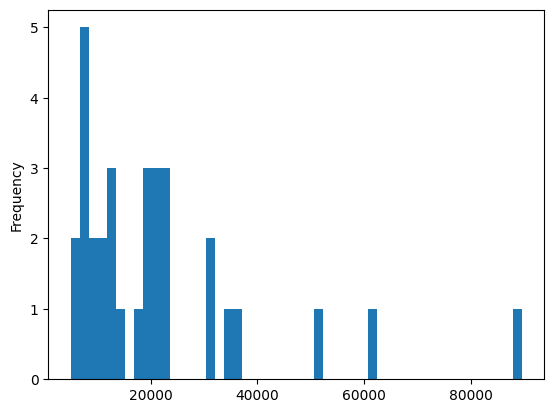

In [62]:
print(copied_df.groupby('name')['price'].mean().sort_values())
print()
copied_df.groupby('name')['price'].mean().plot(kind='hist',subplots=True,bins=50)

**Get the Dummies**

In [65]:
final_df = pd.get_dummies(copied_df, columns=categorical, drop_first=True)
final_df.head()

,year,pozitsiya,engine_size,price,name_Camaro,name_Captiva,name_Cobalt,name_Cruze,name_Damas,name_Epica,...,name_Tracker2,name_Tracker4,name_TrackerPremier,name_TrailBlazer,name_Traverse,fuel_type_Elektr,fuel_type_Gaz-benzin,transmission_Mexanika,transmission_Tiptronik,transmission_Variator
0,2023,1,0.0,10700,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2023,1,0.0,41000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2014,1,1.8,12000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,3,1.8,9200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,2,1.3,11500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# **MODEL SELECTION**



1.   I'll use linear regression model as a base model
2.   And then I will use Ridge, Lasso, Elasticnet, KNeighborsRegressor and Support Vector MAchine Regressor
3.   And then i will use ensemble models, like Randomforest, Gradient Boosting and Extra Trees
4. Finally I will look at the XGBoost Regresson.
5. And after evaluating the algorithm, we will select our best model.
Let's start.



**Baseline Model**

In [66]:
X= final_df.drop('price', axis=1)
y= final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')

model : LinearRegression() and  rmse score is : 2979.163387448429, r2 score is 0.7954033346230782


**Ridge & Lasso & Elasticnet & KNN with Scaler and Transformer**

In [67]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= final_df.drop(['price'], axis=1).select_dtypes('number').columns

X= final_df.drop('price', axis=1)
y= final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


model : Ridge() and  rmse score is : 2988.39, r2 score is 0.79


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+08, tolerance: 5.435e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, d

model : Lasso() and  rmse score is : 2987.54, r2 score is 0.79
model : ElasticNet() and  rmse score is : 3493.91, r2 score is 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


model : KNeighborsRegressor() and  rmse score is : 2769.91, r2 score is 0.82


,RMSE,R2_Test
Ridge,2988.39,0.79
Lasso,2987.54,0.79
ElasticNet,3493.91,0.72
KNeighbors,2769.91,0.82


**Random Forest& Gradient Boosting & Extra Trees & XGBoost**

In [68]:
rmse_test =[]
r2_test =[]
model_names =[]



X= final_df.drop('price', axis=1)
y= final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 2754.49, r2 score is 0.8251
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 2923.51, r2 score is 0.803
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 2774.99, r2 score is 0.8225
model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             pr

,RMSE,R2_Test
RandomForest,2754.49,0.83
GradientBoost,2923.51,0.80
ExtraTree,2774.99,0.82
XGB,2700.70,0.83


**Best Model with the Hyperparameter Tuning**

In [69]:
X= final_df.drop('price', axis=1)
y= final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

 rmse score is : 2753.9023, r2 score is 0.8252
